In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('./train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291142 entries, 0 to 291141
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   merchant_id           291142 non-null  object
 1   month_id              291142 non-null  int64 
 2   merchant_source_name  291142 non-null  object
 3   settlement_period     291142 non-null  object
 4   working_type          291142 non-null  object
 5   mcc_id                291142 non-null  object
 6   merchant_segment      291142 non-null  object
 7   net_payment_count     291142 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 17.8+ MB


In [13]:
df['year'] = pd.to_datetime(df['month_id'], format='%Y%m').dt.year
df['month'] = pd.to_datetime(df['month_id'], format='%Y%m').dt.month

df

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,year,month
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106,2023,7
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918,2023,1
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452,2023,5
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787,2023,8
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428,2023,2
...,...,...,...,...,...,...,...,...,...,...
291137,merchant_67083,202309,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_169,Segment - 4,4,2023,9
291138,merchant_4263,202309,Merchant Source - 2,Settlement Period - 1,Working Type - 6,mcc_73,Segment - 4,4,2023,9
291139,merchant_11346,202309,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_169,Segment - 4,3,2023,9
291140,merchant_21397,202309,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_168,Segment - 4,3,2023,9


In [14]:
# Bağımsız değişkenleri (X) ve bağımlı değişkeni (y) belirle
X = df[['year', 'month', 'merchant_source_name', 'settlement_period', 'working_type', 'mcc_id', 'merchant_segment']]
y = df['net_payment_count']

# Kategorik değişkenleri One-Hot Encoding yapın
X = pd.get_dummies(X, drop_first=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# LinearRegression
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

# LinearRegression tahmin
LR_y_pred = LRmodel.predict(X_val)

mae = mean_absolute_error(y_val, LR_y_pred)
print(f'Linear Regression MAE: {mae}')

Linear Regression MAE: 986.1046179040854


In [6]:
# GradientBoostingRegressor
GBmodel = GradientBoostingRegressor(random_state=42)
GBmodel.fit(X_train, y_train)

GB_y_pred = GBmodel.predict(X_val)

mae = mean_absolute_error(y_val, GB_y_pred)
print(f'Gradient Boosting MAE: {mae}')

Gradient Boosting MAE: 369.3508786638435


In [7]:
from xgboost import XGBRegressor

XGmodel = XGBRegressor(random_state=42)
XGmodel.fit(X_train, y_train)

XG_y_pred = XGmodel.predict(X_val)

mae = mean_absolute_error(y_val, XG_y_pred)
print(f'XGBoost MAE: {mae}')

XGBoost MAE: 254.1829365752574


In [8]:
# RandomForestRegressor
RFmodel = RandomForestRegressor(random_state=42)
RFmodel.fit(X_train, y_train)

# Doğrulama seti üzerinde tahmin yapın
RF_y_pred = RFmodel.predict(X_val)

mae = mean_absolute_error(y_val, RF_y_pred)
print(f'Random Forest MAE: {mae}')

Random Forest MAE: 259.13707344809535


In [23]:
from prophet import Prophet

dfProphet = pd.read_csv('./train.csv')

dfProphet['month_id'] = pd.to_datetime(df['month_id'], format='%Y%m')

dfProphet = dfProphet[['month_id', 'net_payment_count']]
dfProphet.columns = ['ds', 'y']

dfProphet

,ds,y
0,2023-07-01,15106
1,2023-01-01,16918
2,2023-05-01,13452
3,2023-08-01,16787
4,2023-02-01,12428
...,...,...
291137,2023-09-01,4
291138,2023-09-01,4
291139,2023-09-01,3
291140,2023-09-01,3


20:30:47 - cmdstanpy - INFO - Chain [1] start processing
20:30:51 - cmdstanpy - INFO - Chain [1] done processing


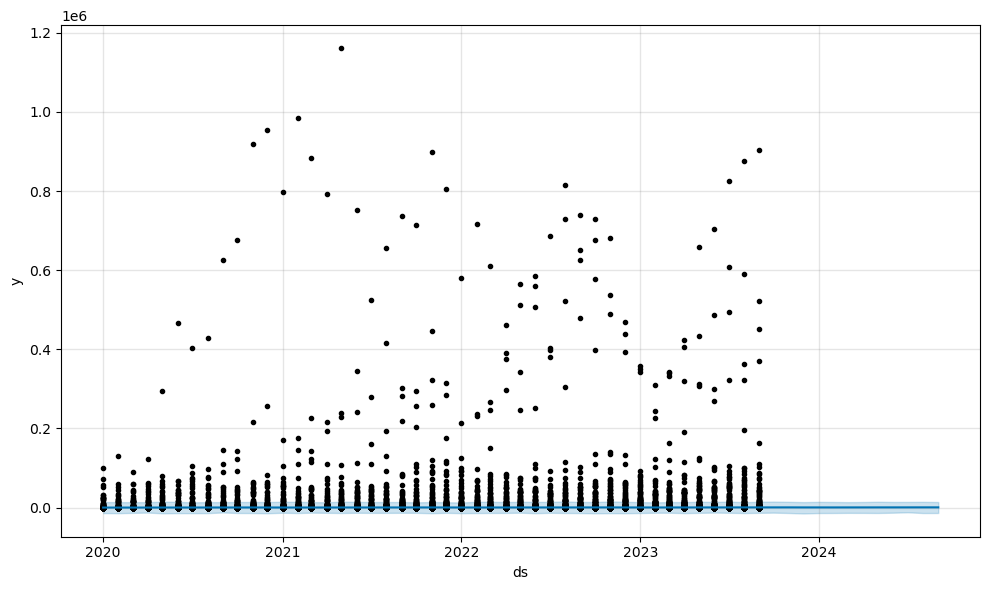

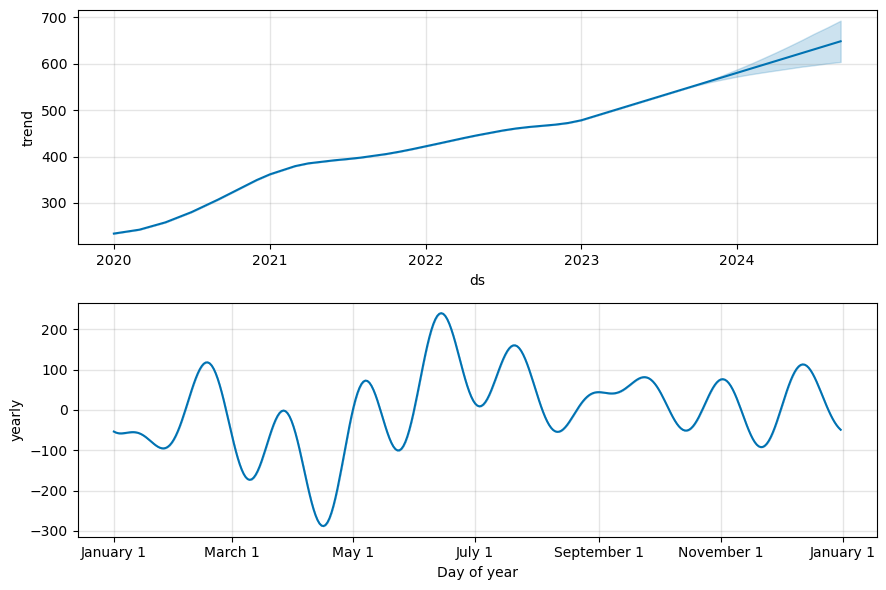

In [21]:
# Prophet modeli oluşturun
prophetModel = Prophet()
prophetModel.fit(dfProphet)

# Tahmin yapın
future = prophetModel.make_future_dataframe(periods=12, freq='M')
forecast = prophetModel.predict(future)

# Tahminleri görselleştirin
fig1 = prophetModel.plot(forecast)

# Tahmin bileşenlerini görselleştirin
fig2 = prophetModel.plot_components(forecast)

ValueError: Found input variables with inconsistent numbers of samples: [58229, 12]